In [1]:
import os
os.chdir('../')

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from tqdm import tqdm
import matplotlib.animation as animation
import re

In [17]:
path = "D:\Doktorat\Essen\debug_data\waves_norm.npy"

path2 = '/Volumes/OTHERS/Doktorat/Essen/debug_data/waves_norm.npy'

In [20]:
waves_norm = np.load(path)

In [21]:
#waves_norm = np.load("D:\\Doktorat\\Essen\\outputs\\1\\test1.npy")

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:16<00:00, 72.71it/s]


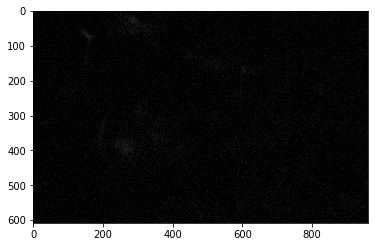

In [22]:
fig = plt.figure()

ims = []
for i in tqdm(range(waves_norm.shape[2])):
    im = plt.imshow(waves_norm[:,:,i], animated=True, cmap='gray', vmin=0, vmax=255)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('D:\\Doktorat\\Essen\\others\\waves_norm1.mp4')

#plt.show()

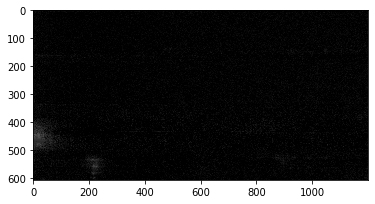

In [51]:
plt.imshow(waves_norm[:,560,:], cmap='gray', vmin=0, vmax=255)

In [52]:
test_slice = waves_norm[:,560,:]

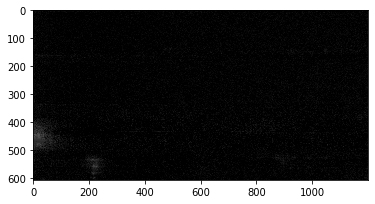

In [53]:
plt.imshow(test_slice, cmap='gray', vmin=0, vmax=255)

In [54]:
test_slice = test_slice.astype('uint8')

In [55]:
edges = cv.Canny(waves_norm[:,560,:], 50, 130, apertureSize = 3)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'


In [10]:
edges = np.ndarray(shape=waves_norm.shape, dtype='uint8')

In [56]:
for i in tqdm(range(waves_norm.shape[1])):
    edges[:,i,:] = waves_norm[:,i,:]

100%|███████████████████████████████████████████████████████████████████████████████| 960/960 [00:04<00:00, 226.45it/s]


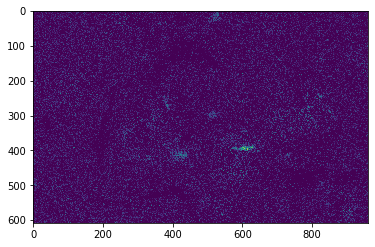

In [57]:
plt.imshow(edges[:,:,300])

In [58]:
waves_detected = np.ndarray(shape=waves_norm.shape, dtype='uint8')

In [91]:
waves_detected = edges.copy()

In [81]:
mean_pixels = np.mean(edges, axis=2)

In [82]:
std_pixels = np.std(edges, axis=2)

In [92]:
for i in tqdm(range(waves_detected.shape[0])):
    for j in range(waves_detected.shape[1]):
        slic = waves_detected[i,j,:]
        threshold = mean_pixels[i,j] + 3*std_pixels[i,j]
        slic[slic > threshold] = 255
        slic[slic <= threshold] = 0
        waves_detected[i,j,:] = slic

100%|███████████████████████████████████████████████████████████████████████████████| 608/608 [00:05<00:00, 108.18it/s]


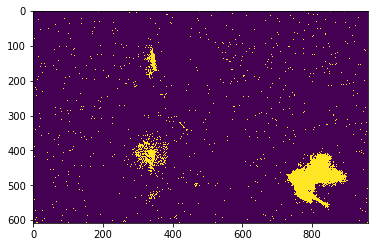

In [93]:
plt.imshow(waves_detected[:,:,500])

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:14<00:00, 82.96it/s]


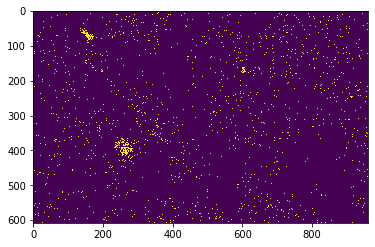

In [94]:
fig = plt.figure()

ims = []
for i in tqdm(range(waves_detected.shape[2])):
    im = plt.imshow(waves_detected[:,:,i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('D:\\Doktorat\\Essen\\others\\astrowaves_waves_defected_adaptive_mean_3std_1.mp4')

#plt.show()

In [86]:
waves_morph = np.ndarray(shape=waves_norm.shape, dtype='uint8')

In [87]:
waves_morph = waves_detected.copy()

In [88]:
import cv2

se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))

for i in tqdm(range(waves_morph.shape[2])):
        slic = waves_morph[:,:,i]
        mask = cv2.morphologyEx(slic, cv2.MORPH_CLOSE, se1)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, se2)
        waves_morph[:,:,i] = slic * mask


100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:25<00:00, 46.48it/s]


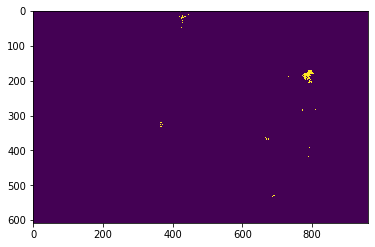

In [89]:
plt.imshow(waves_morph[:,:,1100])

100%|███████████████████████████████████████████████████████████████████████████████| 960/960 [00:04<00:00, 231.90it/s]


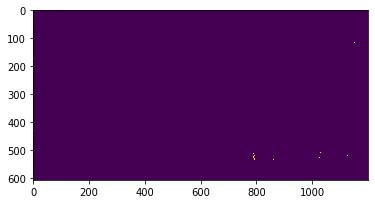

In [95]:
fig = plt.figure()

ims = []
for i in tqdm(range(waves_morph.shape[2])):
    im = plt.imshow(waves_morph[:,:,i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('D:\\Doktorat\\Essen\\others\\astrowaves_morph_front_44_44_3std.mp4')

#plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 608/608 [00:03<00:00, 152.23it/s]


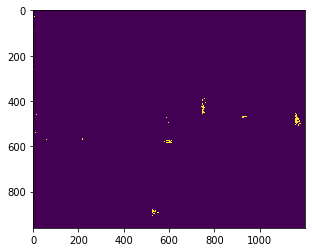

In [96]:
fig = plt.figure()

ims = []
for i in tqdm(range(waves_morph.shape[0])):
    im = plt.imshow(waves_morph[i,:,:], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('D:\\Doktorat\\Essen\\others\\astrowaves_morph_front_44_44_3std_height.mp4')

#plt.show()

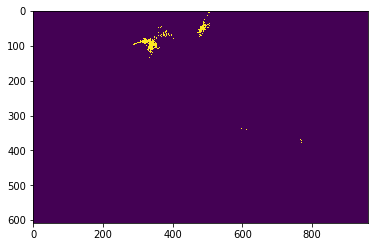

In [117]:
## (7,7) (2,2)
plt.imshow(out)

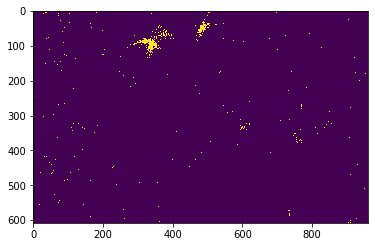

In [109]:
## (7,7) (2,2)
plt.imshow(out)

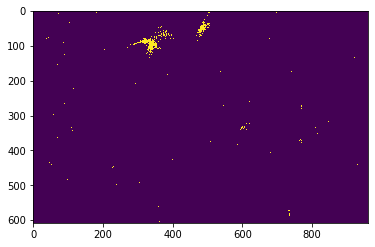

In [107]:
## (5,5) (2,2)
plt.imshow(out)

100%|███████████████████████████████████████████████████████████████████████████████| 960/960 [00:04<00:00, 192.63it/s]


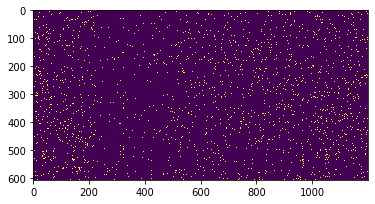

In [99]:
fig = plt.figure()

ims = []
for i in tqdm(range(waves_norm.shape[1])):
    im = plt.imshow(waves_detected[:,i,:], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('D:\\Doktorat\\Essen\\others\\dynamic_images_threshold_2.mp4')

#plt.show()

In [ ]:
for i in tqdm(range(waves_norm.shape[2])):
    edges[:,:,i] = cv.Canny(waves_norm[:,:,i], 70, 130, apertureSize = 3)
    edges[:,:,i] = cv.blur(edges[:,:,i],(5,5))


fig = plt.figure()

ims = []
for i in tqdm(range(waves_norm.shape[2])):
    im = plt.imshow(edges[:,:,i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('D:\\Doktorat\\Essen\\others\\calcium_waves_detected_70_130_front_blurred.mp4')

#plt.show()

In [31]:
for i in tqdm(range(waves_norm.shape[2])):
    waves_detected[:,:,i] = cv.Canny(waves_norm[:,:,i], 70, 130, apertureSize = 3)

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:20<00:00, 59.29it/s]


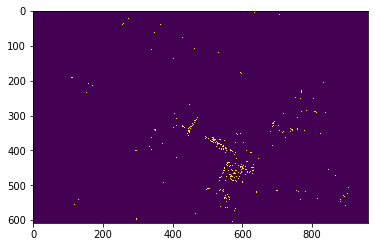

In [33]:
plt.imshow(waves_detected[:,:,300])

In [36]:
wav_detected_blurred = np.ndarray(shape=waves_norm.shape, dtype='uint8')

In [37]:
for i in tqdm(range(waves_norm.shape[2])):
    wav_detected_blurred[:,:,i] = cv.blur(edges[:,:,i],(5,5))

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:19<00:00, 60.98it/s]


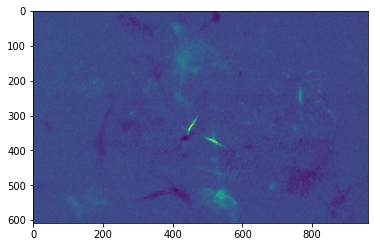

In [38]:
plt.imshow(wav_detected_blurred[:,:,300])

In [ ]:
for i in tqdm(range(waves_norm.shape[2])):
    edges[:,:,i] = cv.Canny(waves_norm[:,:,i], 70, 130, apertureSize = 3)
    edges[:,:,i] = cv.blur(edges[:,:,i],(5,5))

In [ ]:
plt.imshow(edges)

100%|███████████████████████████████████████████████████████████████████████████████| 960/960 [00:04<00:00, 223.88it/s]


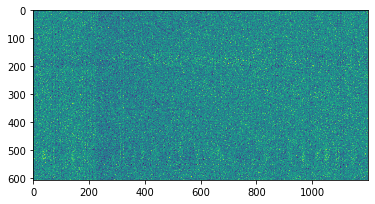

In [16]:

fig = plt.figure()

ims = []
for i in tqdm(range(waves_norm.shape[1])):
    im = plt.imshow(edges[:,i,:], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('D:\\Doktorat\\Essen\\others\\dynamic_images.mp4')

#plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 960/960 [00:01<00:00, 717.25it/s]


In [ ]:
?plt.imshow

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:12<00:00, 93.44it/s]


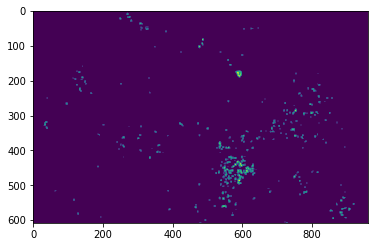

In [30]:

for i in tqdm(range(waves_norm.shape[2])):
    edges[:,:,i] = cv.Canny(waves_norm[:,:,i], 70, 130, apertureSize = 3)
    edges[:,:,i] = cv.blur(edges[:,:,i],(5,5))


fig = plt.figure()

ims = []
for i in tqdm(range(waves_norm.shape[2])):
    im = plt.imshow(edges[:,:,i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('D:\\Doktorat\\Essen\\others\\calcium_waves_detected_70_130_front_blurred.mp4')

#plt.show()

In [ ]:
def updatefig(*args):
    global i
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

In [ ]:
test_slice = waves_norm[:,560,:]

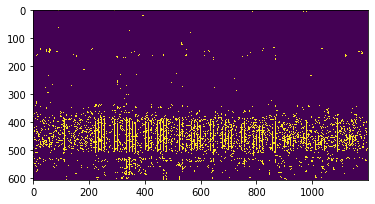

In [27]:
plt.imshow(edges)

In [28]:
signals = np.argwhere(edges == 255)

In [32]:
signals

array([[  0,  76],
       [  0,  77],
       [  0,  78],
       ...,
       [607, 549],
       [607, 909],
       [607, 910]], dtype=int64)

In [134]:
blur = cv.blur(edges, (5,5))

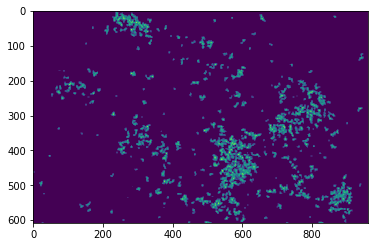

In [123]:
plt.imshow(blur)

In [114]:
blur.max()

184

In [ ]:
plt.imshow()

In [85]:
np.unique(edges)

array([  0, 255], dtype=uint8)

In [37]:
lines = cv.HoughLines(edges,1,np.pi/180, 200) 

In [31]:
lines.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# Python program to illustrate HoughLine 
# method for line detection 
import cv2 
import numpy as np 
  
# Reading the required image in  
# which operations are to be done.  
# Make sure that the image is in the same  
# directory in which this python program is 
img = cv2.imread('image.jpg') 
  
# Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
  
# Apply edge detection method on the image 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 
  
# This returns an array of r and theta values 
lines = cv2.HoughLines(edges,1,np.pi/180, 200) 
  
# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2) 
      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', img)